In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
## for preprocessing and crating models:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Embedding,LSTM,Dropout,Concatenate
from tensorflow.keras.layers import Bidirectional
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
!ls /content/drive/MyDrive

'AI prestentation.gdoc'			     predictions_plot.png
 Classroom				    'Project proposal.gdoc'
'Colab Notebooks'			     reviews.txt
 df1_meta.csv				     Singh_nupur.pdf
'Fake Postings.csv'			     Sleep_health_and_lifestyle_dataset.csv
'Fendous  blood group detection app.gdoc'   'spam (1).csv'
'Fendous@ detection of phishing mail.gdoc'   test.csv
'kaggle (5).json'			     tmdb_5000_movies1.csv
'LISTEN TO YOUR HEART.gslides'		     train.csv
 movie_metadata.csv			    'Untitled document (1).gdoc'
 movies_metadata.csv			    'Untitled document.gdoc'
 new.csv				     val.csv
 Nupur_Project_ppt.pptx


In [5]:
csv_path1 = "/content/drive/My Drive/train.csv"
csv_path2 = "/content/drive/My Drive/test.csv"
csv_path3 = "/content/drive/My Drive/val.csv"  # Ensure this file exists at this location

# Read the CSV files
train = pd.read_csv(csv_path1)
test = pd.read_csv(csv_path2)
val = pd.read_csv(csv_path3)

In [6]:
train.head()

,tweet_id,user_handle,timestamp,tweet_text,candidate,party,retweets,likes,sentiment
0,1,@user123,2024-11-03 08:45:00,Excited to see Kamala Harris leading the Democ...,Kamala Harris,Democratic Party,120,450,positive
1,2,@politicsFan,2024-11-03 09:15:23,Donald Trump's policies are the best for our e...,Donald Trump,Republican Party,85,300,positive
2,3,@greenAdvocate,2024-11-03 10:05:45,Jill Stein's environmental plans are exactly w...,Jill Stein,Green Party,60,200,positive
3,4,@indieVoice,2024-11-03 11:20:10,Robert Kennedy offers a fresh perspective outs...,Robert Kennedy,Independent,40,150,neutral
4,5,@libertyLover,2024-11-03 12:35:55,Chase Oliver's libertarian stance promotes tru...,Chase Oliver,Libertarian Party,30,120,positive


In [7]:
train.columns

Index(['tweet_id', 'user_handle', 'timestamp', 'tweet_text', 'candidate',
       'party', 'retweets', 'likes', 'sentiment'],
      dtype='object')

In [8]:
distinct_sentiments = train["sentiment"].unique()

In [9]:
distinct_sentiments

array(['positive', 'neutral', 'negative', 'positive  '], dtype=object)

In [10]:
## clean the sentiment column in memory:
train["sentiment"]= train["sentiment"].str.strip()
distinct_sentiments= train["sentiment"].unique()

In [11]:
distinct_sentiments

array(['positive', 'neutral', 'negative'], dtype=object)

In [12]:
## Cleaning the data for test and val
test.head()

,tweet_id,user_handle,timestamp,tweet_text,candidate,party,retweets,likes,sentiment
0,501,@user1068,2025-02-11 08:30:10,Kamala Harris's new policy on education reform...,Kamala Harris,Democratic Party,85,320,positive
1,502,@politicsNew2,2025-02-11 09:15:20,Donald Trump's latest speech on the economy wa...,Donald Trump,Republican Party,100,450,positive
2,503,@greenVisionary2,2025-02-11 10:05:35,Jill Stein's environmental policies are a step...,Jill Stein,Green Party,60,200,positive
3,504,@indieWatcher2,2025-02-11 11:25:40,Robert Kennedy's independent run brings fresh ...,Robert Kennedy,Independent,30,120,neutral
4,505,@libertyFan4,2025-02-11 12:40:50,Chase Oliver's stance on gun rights is unwaver...,Chase Oliver,Libertarian Party,50,160,positive


In [13]:
test["sentiment"]= test["sentiment"].str.strip()
distinct_sentiments= test["sentiment"].unique()

In [14]:
distinct_sentiments

array(['positive', 'neutral', 'negative'], dtype=object)

In [15]:
val.head()

,tweet_id,user_handle,timestamp,tweet_text,candidate,party,retweets,likes,sentiment
0,551,@user1077,2025-02-21 08:30:10,Kamala Harris's new policy on education reform...,Kamala Harris,Democratic Party,85,320,positive
1,552,@politicsNew3,2025-02-21 09:15:20,Donald Trump's latest speech on the economy wa...,Donald Trump,Republican Party,100,450,positive
2,553,@greenVisionary3,2025-02-21 10:05:35,Jill Stein's environmental policies are a step...,Jill Stein,Green Party,60,200,positive
3,554,@indieWatcher3,2025-02-21 11:25:40,Robert Kennedy's independent run brings fresh ...,Robert Kennedy,Independent,30,120,neutral
4,555,@libertyFan5,2025-02-21 12:40:50,Chase Oliver's stance on gun rights is unwaver...,Chase Oliver,Libertarian Party,50,160,positive


In [16]:
val["sentiment"] = val["sentiment"].str.strip()

In [17]:
distinct_sentiments = val["sentiment"].unique()

In [18]:
distinct_sentiments

array(['positive', 'neutral', 'negative'], dtype=object)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet_id     500 non-null    int64 
 1   user_handle  500 non-null    object
 2   timestamp    500 non-null    object
 3   tweet_text   500 non-null    object
 4   candidate    500 non-null    object
 5   party        500 non-null    object
 6   retweets     500 non-null    int64 
 7   likes        500 non-null    int64 
 8   sentiment    500 non-null    object
dtypes: int64(3), object(6)
memory usage: 35.3+ KB


In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet_id     50 non-null     int64 
 1   user_handle  50 non-null     object
 2   timestamp    50 non-null     object
 3   tweet_text   50 non-null     object
 4   candidate    50 non-null     object
 5   party        50 non-null     object
 6   retweets     50 non-null     int64 
 7   likes        50 non-null     int64 
 8   sentiment    50 non-null     object
dtypes: int64(3), object(6)
memory usage: 3.6+ KB


In [21]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet_id     50 non-null     int64 
 1   user_handle  50 non-null     object
 2   timestamp    50 non-null     object
 3   tweet_text   50 non-null     object
 4   candidate    50 non-null     object
 5   party        50 non-null     object
 6   retweets     50 non-null     int64 
 7   likes        50 non-null     int64 
 8   sentiment    50 non-null     object
dtypes: int64(3), object(6)
memory usage: 3.6+ KB


In [22]:
train.describe()

,tweet_id,retweets,likes
count,500.000000,500.000000,500.000000
mean,250.500000,64.236000,248.920000
std,144.481833,27.715349,120.562034
min,1.000000,18.000000,85.000000
25%,125.750000,40.000000,150.000000
50%,250.500000,70.000000,225.000000
75%,375.250000,90.000000,340.000000
max,500.000000,120.000000,500.000000


In [23]:
test.describe()

,tweet_id,retweets,likes
count,50.00000,50.000000,50.000000
mean,525.50000,64.360000,248.400000
std,14.57738,27.942185,122.167667
min,501.00000,18.000000,85.000000
25%,513.25000,41.250000,150.000000
50%,525.50000,67.500000,222.500000
75%,537.75000,90.000000,340.000000
max,550.00000,115.000000,480.000000


In [24]:
val.describe()

,tweet_id,retweets,likes
count,50.00000,50.000000,50.000000
mean,575.50000,64.360000,248.400000
std,14.57738,27.942185,122.167667
min,551.00000,18.000000,85.000000
25%,563.25000,41.250000,150.000000
50%,575.50000,67.500000,222.500000
75%,587.75000,90.000000,340.000000
max,600.00000,115.000000,480.000000


In [25]:
train.duplicated().sum()

0

In [26]:
test.duplicated().sum()

0

In [27]:
val.duplicated().sum()

0

In [28]:
sentiment_mapping = {"positive":1,"neutral":2,"negative":3}
train["sentiment_encoded"]= train["sentiment"].map(sentiment_mapping)

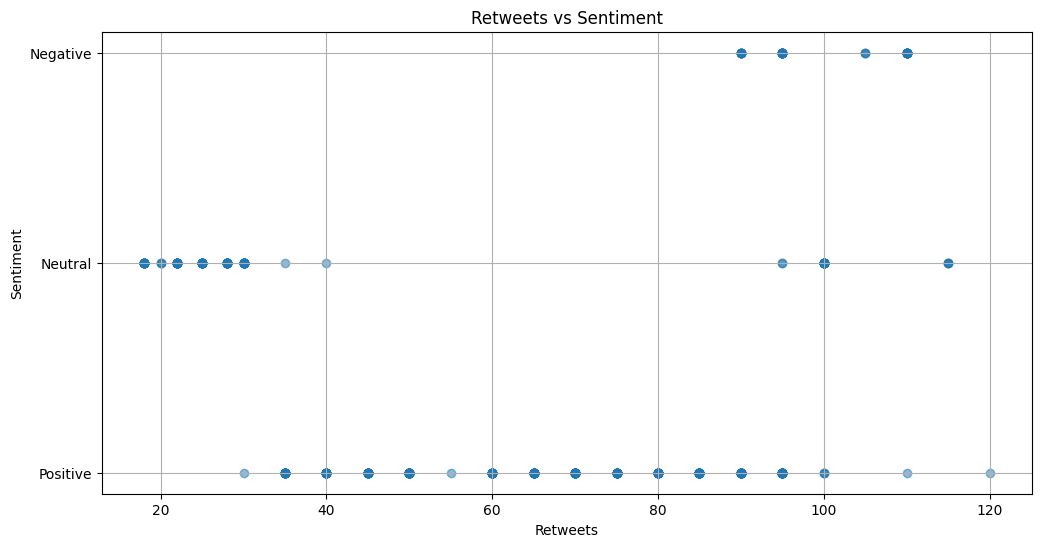

In [29]:
## plot Retweet vs Sentiment:
plt.figure(figsize =(12,6))
plt.scatter(train["retweets"],train["sentiment_encoded"],alpha=0.5)
plt.title("Retweets vs Sentiment")
plt.xlabel("Retweets")
plt.ylabel("Sentiment")
plt.yticks([1,2,3],["Positive","Neutral","Negative"])
plt.grid(True)
plt.show()

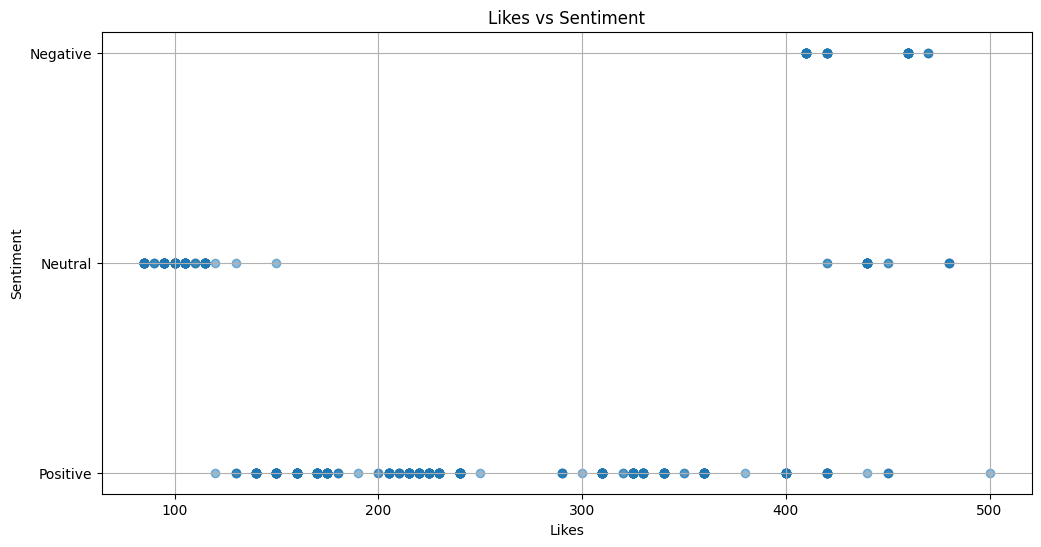

In [30]:
## PLOT LIKEs VS SENTIMENT:
plt.figure(figsize =(12,6))
plt.scatter(train["likes"],train["sentiment_encoded"],alpha=0.5)
plt.title("Likes vs Sentiment")
plt.xlabel("Likes")
plt.ylabel("Sentiment")
plt.yticks([1,2,3],["Positive","Neutral","Negative"])
plt.grid(True)
plt.show()

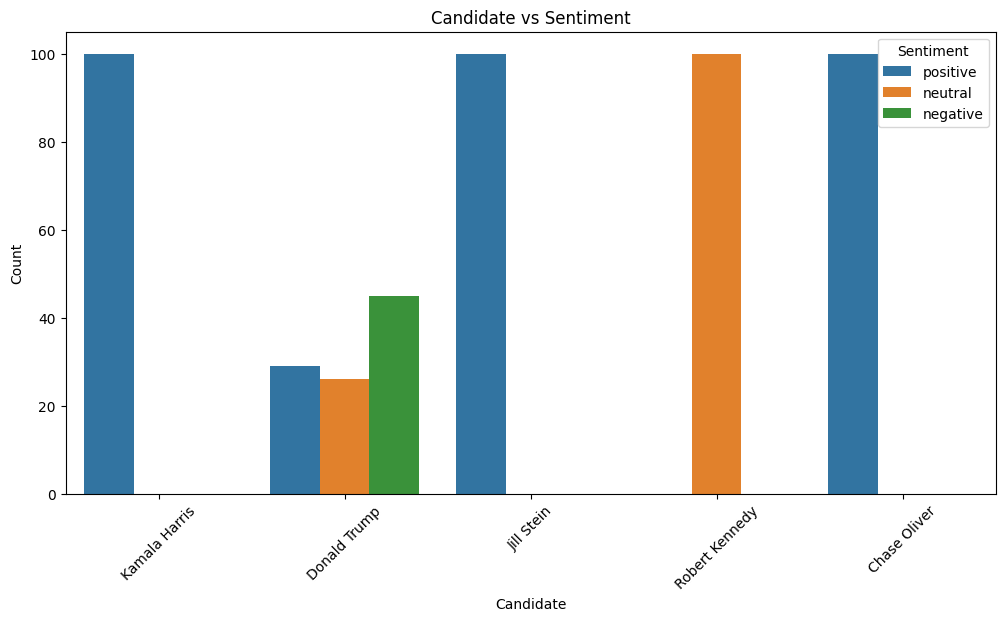

In [31]:
## Plot the graph Candidate vs  sentiment:
plt.figure(figsize=(12,6))
sns.countplot(x = "candidate",hue = "sentiment",data = train)
plt.title("Candidate vs Sentiment")
plt.xlabel("Candidate")
plt.ylabel("Count")
plt.xticks(rotation= 45)
plt.legend(title = "Sentiment")
plt.show()

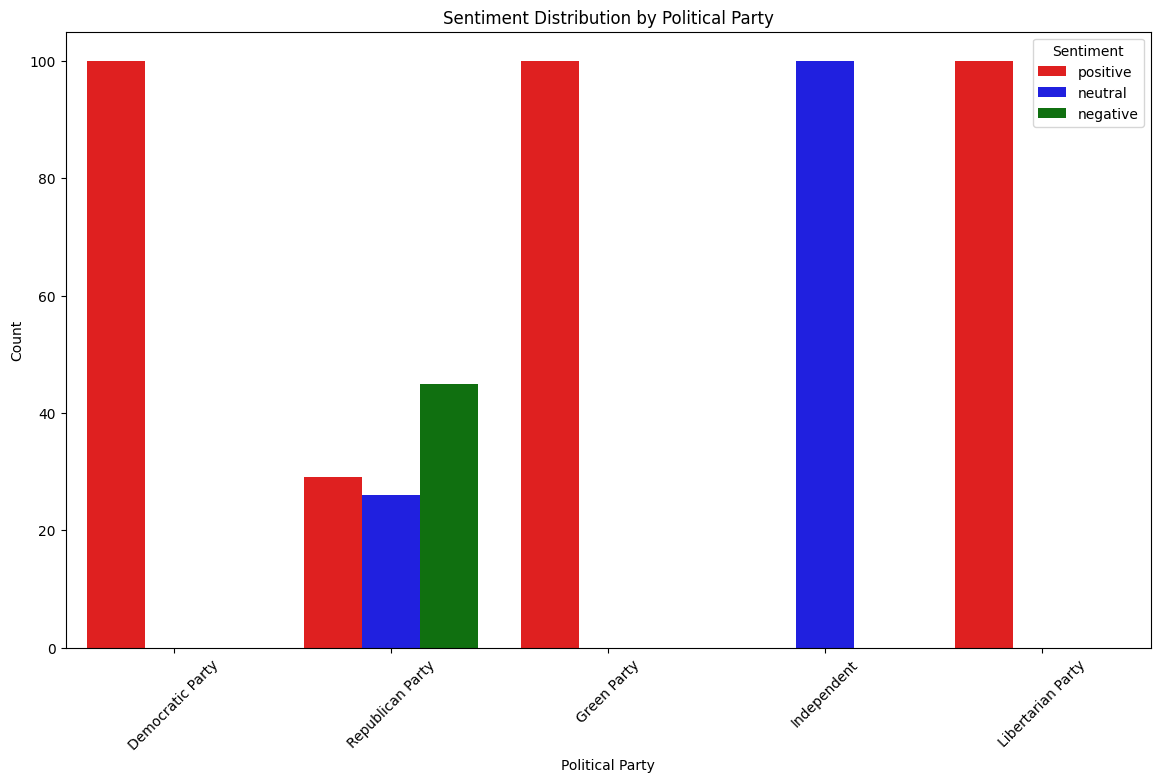

In [32]:
## sentiment distribution across parties:
plt.figure(figsize=(14,8))
custom_palette = ["red", "blue", "green"]
sns.countplot(x = "party",hue = "sentiment",data= train,palette=custom_palette)
plt.title("Sentiment Distribution by Political Party")
plt.xlabel("Political Party")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.legend(title = "Sentiment")
plt.show()

In [33]:
## Data preparation:
## Feature Selection:
##(a)tweet_text
##(b)retweets
##(c)likes
##These features will be used to train the model to predict the sentiment of the tweets.
train["sentiment"]= train["sentiment"].str.strip()
test["sentiment"]= test["sentiment"].str.strip()
val["sentiment"]= val["sentiment"].str.strip()
## combine tweet_text
combined_text = pd.concat([train["tweet_text"],test["tweet_text"],val["tweet_text"]])


In [34]:
tokenizer = Tokenizer(oov_token= "<oov>")
tokenizer.fit_on_texts(combined_text)
word_index = tokenizer.word_index
## Gererate sequences for each datasets:
train_sequences= tokenizer.texts_to_sequences(train["tweet_text"])
test_sequences= tokenizer.texts_to_sequences(test["tweet_text"])
val_sequences= tokenizer.texts_to_sequences(val["tweet_text"])
##Define maximum length for padding:
max_length = 50

# Pad the sequences
train_padded_sequences = pad_sequences(train_sequences, maxlen=max_length, padding="post")
test_padded_sequences = pad_sequences(test_sequences, maxlen=max_length, padding="post")
val_padded_sequences = pad_sequences(val_sequences, maxlen=max_length, padding="post")

# Add the padded sequences to the respective DataFrame
train["input_sequences"] = list(train_padded_sequences)
val["input_sequences"] = list(val_padded_sequences)
test["input_sequences"] = list(test_padded_sequences)



In [35]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder on the training data and transform all datasets
train_integer_encoded = label_encoder.fit_transform(train["sentiment"])
val_integer_encoded = label_encoder.transform(val["sentiment"])  # Use transform, not fit_transform
test_integer_encoded = label_encoder.transform(test["sentiment"])  # Use transform, not fit_transform

# Reshape the integer-encoded labels to 2D (required for OneHotEncoder)
train_integer_encoded = train_integer_encoded.reshape(-1, 1)
val_integer_encoded = val_integer_encoded.reshape(-1, 1)
test_integer_encoded = test_integer_encoded.reshape(-1, 1)

# Initialize the OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False)

# Fit the OneHotEncoder on the training data and transform all datasets
train_onehot_encoded = onehot_encoder.fit_transform(train_integer_encoded)
val_onehot_encoded = onehot_encoder.transform(val_integer_encoded)  # Use transform, not fit_transform
test_onehot_encoded = onehot_encoder.transform(test_integer_encoded)  # Use transform, not fit_transform

# Add the one-hot encoded labels to the respective DataFrames (optional)
train["onehot_sentiment"] = list(train_onehot_encoded)
val["onehot_sentiment"] = list(val_onehot_encoded)
test["onehot_sentiment"] = list(test_onehot_encoded)

In [36]:
train[["tweet_text","input_sequences","sentiment","onehot_sentiment"]].head()
val[["tweet_text","input_sequences","sentiment","onehot_sentiment"]].head()
test[["tweet_text","input_sequences","sentiment","onehot_sentiment"]].head()

,tweet_text,input_sequences,sentiment,onehot_sentiment
0,Kamala Harris's new policy on education reform...,"[5, 22, 19, 38, 18, 49, 145, 2, 278, 0, 0, 0, ...",positive,"[0.0, 0.0, 1.0]"
1,Donald Trump's latest speech on the economy wa...,"[239, 6, 34, 86, 18, 10, 240, 279, 280, 281, 0...",positive,"[0.0, 0.0, 1.0]"
2,Jill Stein's environmental policies are a step...,"[7, 16, 181, 12, 3, 13, 282, 24, 10, 223, 283,...",positive,"[0.0, 0.0, 1.0]"
3,Robert Kennedy's independent run brings fresh ...,"[8, 26, 36, 203, 206, 217, 116, 4, 10, 229, 0,...",neutral,"[0.0, 1.0, 0.0]"
4,Chase Oliver's stance on gun rights is unwaver...,"[9, 20, 30, 18, 160, 54, 2, 284, 0, 0, 0, 0, 0...",positive,"[0.0, 0.0, 1.0]"


In [37]:
## preparing Validation and test data :
train_input = np.array(train_padded_sequences)
val_input = np.array(val_padded_sequences)
test_input = np.array(test_padded_sequences)

train_label = np.array(train_onehot_encoded)
val_label = np.array(val_onehot_encoded)
test_label = np.array(test_onehot_encoded)



In [38]:
## creating a model :
##Model 1: LSTM-based Sentiment Analysis Model
##Model Architecture


In [39]:
vocab_size = len(word_index)+1
embedding_dim = 100
lstm_units = 128
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim = vocab_size,output_dim= embedding_dim,input_length=max_length),
    tf.keras.layers.LSTM(units=lstm_units,return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units=lstm_units),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 64,activation = "relu"),
    tf.keras.layers.Dense(units = 3,activation = "softmax")
])
model.compile(optimizer = "adam",loss= "categorical_crossentropy",metrics=["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [40]:
##Train the model:
history = model.fit(train_input,train_label,epochs=64,batch_size = 32,validation_data=(val_input,val_label))

Epoch 1/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - accuracy: 0.6580 - loss: 0.9503 - val_accuracy: 0.6800 - val_loss: 0.7869
Epoch 2/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6609 - loss: 0.8393 - val_accuracy: 0.6800 - val_loss: 0.7981
Epoch 3/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6139 - loss: 0.9149 - val_accuracy: 0.6800 - val_loss: 0.7855
Epoch 4/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6458 - loss: 0.8846 - val_accuracy: 0.6800 - val_loss: 0.7845
Epoch 5/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6605 - loss: 0.8323 - val_accuracy: 0.6800 - val_loss: 0.7895
Epoch 6/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6828 - loss: 0.8060 - val_accuracy: 0.6800 - val_loss: 0.7951
Epoch 7/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6534 - loss: 0.8758 - val_accuracy: 0.6800 - val_loss: 0.7865
Epoch 8/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6597 - loss: 0.8638 - val_accuracy: 0.6800 - v

In [41]:
## Evaluate the model:
loss,accuracy = model.evaluate(test_input,test_label)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8546 - loss: 0.3680
Test Loss: 0.3639
Test Accuracy: 0.8600


In [42]:
##Model 2: LSTM-based Sentiment Analysis with Additional Features:

In [43]:
## Normalize retweets and likes:

scaler = StandardScaler()
train_additional_features = scaler.fit_transform(train[["retweets","likes"]])
val_additional_features = scaler.fit_transform(val[["retweets","likes"]])
test_additional_features = scaler.fit_transform(test[["retweets","likes"]])



In [44]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Dropout, Dense, Concatenate
from tensorflow.keras.models import Model

vocab_size = len(word_index) + 1
embedding_dim = 100
lstm_units = 128

## Text input
text_input = Input(shape=(max_length,), name="text_input")
embedding = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length)(text_input)
lstm_out = LSTM(units=lstm_units, return_sequences=True)(embedding)
lstm_out = Dropout(0.2)(lstm_out)
lstm_out = LSTM(units=lstm_units)(lstm_out)
lstm_out = Dropout(0.2)(lstm_out)

## Additional features input:
additional_input = Input(shape=(2,), name="additional_input")
concat = Concatenate()([lstm_out, additional_input])

## Fully concatenated layers:
dense = Dense(units=64, activation="relu")(concat)
output = Dense(units=3, activation="softmax")(dense)

## Define the model:
model = Model(inputs=[text_input, additional_input], outputs=output)

## Compile the model:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [45]:
## Train the model :
history = model.fit([train_input,train_additional_features],train_label,epochs=32,batch_size = 32,validation_data=([val_input,val_additional_features],val_label))


Epoch 1/32
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.5814 - loss: 0.9341 - val_accuracy: 0.7200 - val_loss: 0.6818
Epoch 2/32
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6878 - loss: 0.7367 - val_accuracy: 0.6800 - val_loss: 0.6449
Epoch 3/32
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6856 - loss: 0.6977 - val_accuracy: 0.8800 - val_loss: 0.6456
Epoch 4/32
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7808 - loss: 0.6524 - val_accuracy: 0.8400 - val_loss: 0.6113
Epoch 5/32
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7774 - loss: 0.6273 - val_accuracy: 0.8800 - val_loss: 0.5778
Epoch 6/32
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7958 - loss: 0.5998 - val_accuracy: 0.8800 - val_loss: 0.5958
Epoch 7/32
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8076 - loss: 0.6022 - val_accuracy: 0.8800 - val_loss: 0.5617
Epoch 8/32
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8083 - loss: 0.5713 - val_accuracy: 0.8800 - v

In [46]:
## Evaluate the model:
loss,accuracy = model.evaluate([test_input,test_additional_features],test_label)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9392 - loss: 0.1707
Test Loss: 0.1673
Test Accuracy: 0.9400


In [47]:
##Bidirectional LSTM based on sentiment analysis:
##Embedding Layer: Converts words into dense vectors.

##Bidirectional LSTM Layers: Two Bidirectional LSTM layers to capture forward and backward dependencies.
##Dropout Layers: Prevent overfitting.
##Dense Layers: Fully connected layers for classification.

In [48]:
## Define the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense, Bidirectional

# Define the model
vocab_size = len(word_index) + 1
embedding_dim = 100
lstm_units = 128

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    Bidirectional(LSTM(units=lstm_units, return_sequences=False)),  # Change to return_sequences=False
    Dropout(0.2),
    Dense(units=64, activation="relu"),
    Dense(units=3, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(train_input, train_label, epochs=10, batch_size=32, validation_data=(val_input, val_label))


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.5981 - loss: 0.9544 - val_accuracy: 0.6800 - val_loss: 0.6164
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7965 - loss: 0.5313 - val_accuracy: 0.9200 - val_loss: 0.1756
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9107 - loss: 0.1981 - val_accuracy: 1.0000 - val_loss: 0.0385
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9844 - loss: 0.0579 - val_accuracy: 1.0000 - val_loss: 0.0249
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9964 - loss: 0.0412 - val_accuracy: 0.9800 - val_loss: 0.0292
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9925 - loss: 0.0267 - val_accuracy: 1.0000 - val_loss: 0.0055
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9937 - loss: 0.0234 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9996 - loss: 0.0039 - val_accuracy: 1.0000 - v

In [49]:
## Evaluate the model:
loss,accuracy = model.evaluate([test_input,test_additional_features],test_label)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_16
Received: inputs=('Tensor(shape=(None, 50))', 'Tensor(shape=(None, 2))')
  warnings.warn(msg)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 2.7349e-04 
Test Loss: 0.0002
Test Accuracy: 1.0000
